In [57]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

style.use('fivethirtyeight')

df = pd.read_csv('../data/COVID19_Qc_RapportINSPQ_HistoVigie.csv')

In [58]:
df = df.drop(0)
df

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Nvx_Deces_Total
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
...,...,...,...,...,...
1266,2023-07-11,1350843,101,18013,1
1267,2023-07-12,1350943,100,18014,1
1268,2023-07-13,1351047,104,18019,5
1269,2023-07-14,1351156,109,18019,0


In [59]:
df.describe()

,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Nvx_Deces_Total
count,1.270000e+03,1270.000000,1270.000000,1270.000000
mean,6.359949e+05,1063.948031,11045.512598,14.188189
std,5.025011e+05,1870.192153,5175.662048,19.970625
min,0.000000e+00,0.000000,0.000000,0.000000
25%,1.451208e+05,277.500000,6870.750000,3.000000
50%,4.157845e+05,681.000000,10747.500000,7.000000
75%,1.179266e+06,1123.000000,15731.500000,15.000000
max,1.351214e+06,18775.000000,18019.000000,133.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 1 to 1270
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      1270 non-null   object
 1   Nb_Cas_Cumulatif          1270 non-null   int64 
 2   Nb_Nvx_Cas                1270 non-null   int64 
 3   Nb_Deces_Cumulatif_Total  1270 non-null   int64 
 4   Nb_Nvx_Deces_Total        1270 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 49.7+ KB


In [61]:
df['Date'] = pd.to_datetime(df['Date'])

start_date = pd.to_datetime('2020-01-23')
end_date = pd.to_datetime('2021-02-23')
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

df_filtered

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Nvx_Deces_Total
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
...,...,...,...,...,...
394,2021-02-19,273383,756,9675,9
395,2021-02-20,274136,753,9690,15
396,2021-02-21,274930,794,9701,11
397,2021-02-22,275550,620,9710,9


# RDD for The 20/3/2020 lockdown

Lockdown 1 - Regression Before Event:
                            OLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     6.732
Date:                Sat, 22 Jul 2023   Prob (F-statistic):             0.0121
Time:                        00:45:44   Log-Likelihood:                -183.31
No. Observations:                  57   AIC:                             370.6
Df Residuals:                      55   BIC:                             374.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

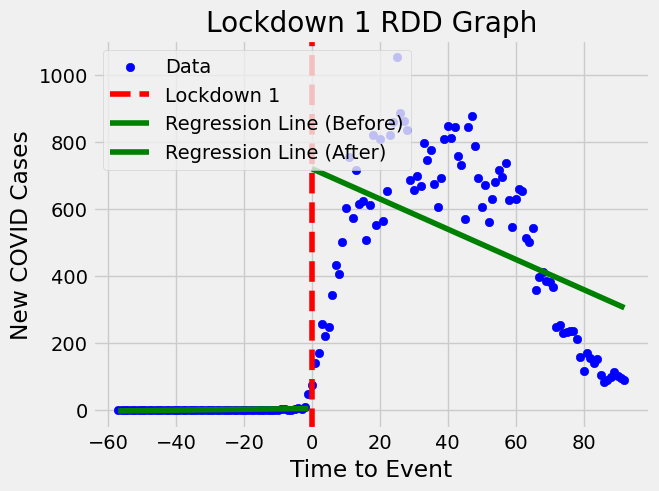

In [71]:
event_label = 'Lockdown 1'
start_date = pd.to_datetime('2020-03-20') - pd.DateOffset(months=3)
end_date = pd.to_datetime('2020-03-20') + pd.DateOffset(months=3)

df_event = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

event_date = pd.to_datetime('2020-03-20')

df_event['TimeToEvent'] = (df_event['Date'] - event_date).dt.days

df_before = df_event[df_event['TimeToEvent'] < 0]
X_before = df_before['TimeToEvent']
X_before_const = sm.add_constant(X_before)  
y_before = df_before['Nb_Nvx_Cas']
model_before = sm.OLS(y_before, X_before_const).fit()

df_after = df_event[df_event['TimeToEvent'] >= 0]
X_after = df_after['TimeToEvent']
X_after_const = sm.add_constant(X_after)  
y_after = df_after['Nb_Nvx_Cas']
model_after = sm.OLS(y_after, X_after_const).fit() 

print(f'{event_label} - Regression Before Event:')
print(model_before.summary())
print()
print()
print()
print()
print(f'{event_label} - Regression After Event:')
print(model_after.summary())

plt.scatter(df_event['TimeToEvent'], df_event['Nb_Nvx_Cas'], color='blue', label='Data')
plt.axvline(x=0, color='red', linestyle='--', label=event_label)

plt.plot(df_before['TimeToEvent'], model_before.predict(X_before_const), color='green', label='Regression Line (Before)')

plt.plot(df_after['TimeToEvent'], model_after.predict(X_after_const), color='green', label='Regression Line (After)')

plt.xlabel('Time to Event')
plt.ylabel('New COVID Cases')
plt.title(f'{event_label} RDD Graph')
plt.legend()
plt.show()

Lockdown 1 - Regression Before Event (with Polynomial Features):
                            OLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     9.100
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           0.000393
Time:                        00:45:45   Log-Likelihood:                -178.33
No. Observations:                  57   AIC:                             362.7
Df Residuals:                      54   BIC:                             368.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

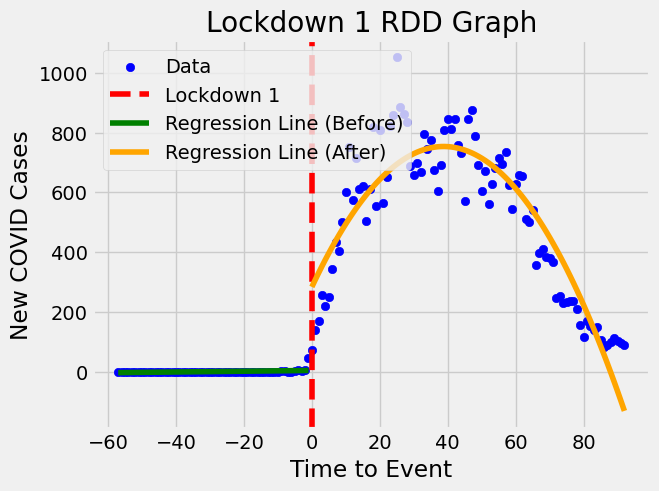

In [72]:
df_before = df_event[df_event['TimeToEvent'] < 0]
df_after = df_event[df_event['TimeToEvent'] >= 0]


X_before = df_before['TimeToEvent']
y_before = df_before['Nb_Nvx_Cas']
model_before = sm.OLS(y_before, sm.add_constant(X_before)).fit()

X_after = df_after['TimeToEvent']
y_after = df_after['Nb_Nvx_Cas']
model_after = sm.OLS(y_after, sm.add_constant(X_after)).fit()


degree = 2 
X_before_poly = pd.DataFrame({'TimeToEvent': X_before, 'TimeToEvent^2': X_before**2})
model_before_poly = sm.OLS(y_before, sm.add_constant(X_before_poly)).fit()

X_after_poly = pd.DataFrame({'TimeToEvent': X_after, 'TimeToEvent^2': X_after**2})
model_after_poly = sm.OLS(y_after, sm.add_constant(X_after_poly)).fit()

print(f'{event_label} - Regression Before Event (with Polynomial Features):')
print(model_before_poly.summary())
print()
print(f'{event_label} - Regression After Event (with Polynomial Features):')
print(model_after_poly.summary())

plt.scatter(df_event['TimeToEvent'], df_event['Nb_Nvx_Cas'], color='blue', label='Data')
plt.axvline(x=0, color='red', linestyle='--', label=event_label)


plt.plot(X_before, model_before.predict(sm.add_constant(X_before)), color='green', label='Regression Line (Before)')


X_after_plot = pd.DataFrame({'TimeToEvent': X_after, 'TimeToEvent^2': X_after**2})
plt.plot(X_after, model_after_poly.predict(sm.add_constant(X_after_plot)), color='orange', label='Regression Line (After)')

plt.xlabel('Time to Event')
plt.ylabel('New COVID Cases')
plt.title(f'{event_label} RDD Graph')
plt.legend()
plt.show()

# RDD for The reopening of schools on 31/8/2020

Schools Reopening - Regression Before Event:
                            OLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     10.48
Date:                Sat, 22 Jul 2023   Prob (F-statistic):            0.00169
Time:                        00:46:38   Log-Likelihood:                -482.55
No. Observations:                  92   AIC:                             969.1
Df Residuals:                      90   BIC:                             974.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const

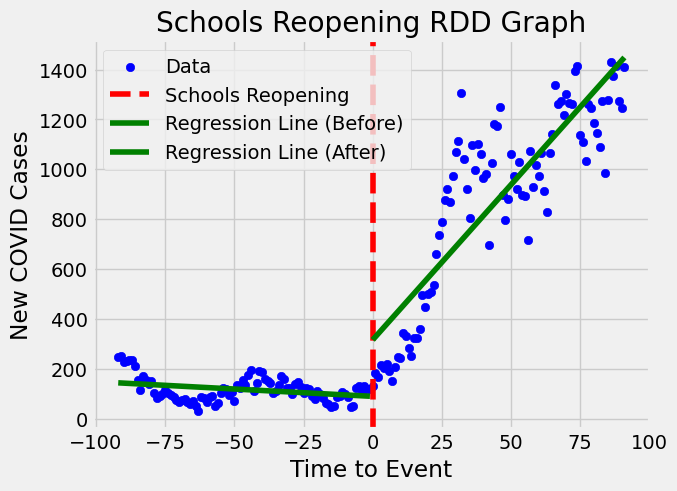

In [75]:
event_label = 'Schools Reopening'
start_date = pd.to_datetime('2020-08-31') - pd.DateOffset(months=3)
end_date = pd.to_datetime('2020-08-31') + pd.DateOffset(months=3)

df_event = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

event_date = pd.to_datetime('2020-08-31')

df_event['TimeToEvent'] = (df_event['Date'] - event_date).dt.days

df_before = df_event[df_event['TimeToEvent'] < 0]
X_before = df_before['TimeToEvent']
X_before_const = sm.add_constant(X_before)  
y_before = df_before['Nb_Nvx_Cas']
model_before = sm.OLS(y_before, X_before_const).fit()

df_after = df_event[df_event['TimeToEvent'] >= 0]
X_after = df_after['TimeToEvent']
X_after_const = sm.add_constant(X_after)  
y_after = df_after['Nb_Nvx_Cas']
model_after = sm.OLS(y_after, X_after_const).fit() 

print(f'{event_label} - Regression Before Event:')
print(model_before.summary())
print()
print()
print()
print()
print(f'{event_label} - Regression After Event:')
print(model_after.summary())

plt.scatter(df_event['TimeToEvent'], df_event['Nb_Nvx_Cas'], color='blue', label='Data')
plt.axvline(x=0, color='red', linestyle='--', label=event_label)

plt.plot(df_before['TimeToEvent'], model_before.predict(X_before_const), color='green', label='Regression Line (Before)')

plt.plot(df_after['TimeToEvent'], model_after.predict(X_after_const), color='green', label='Regression Line (After)')

plt.xlabel('Time to Event')
plt.ylabel('New COVID Cases')
plt.title(f'{event_label} RDD Graph')
plt.legend()
plt.show()

Schools Reopening - Regression Before Event (with Polynomial Features):
                            OLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     9.546
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           0.000175
Time:                        00:46:39   Log-Likelihood:                -478.68
No. Observations:                  92   AIC:                             963.4
Df Residuals:                      89   BIC:                             970.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

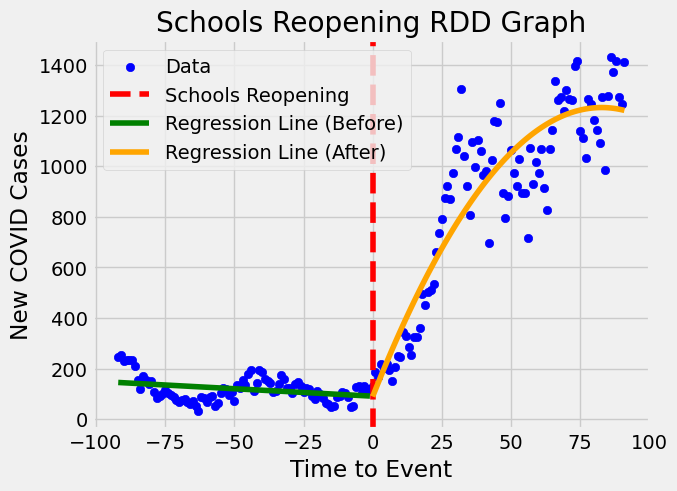

In [76]:
df_before = df_event[df_event['TimeToEvent'] < 0]
df_after = df_event[df_event['TimeToEvent'] >= 0]


X_before = df_before['TimeToEvent']
y_before = df_before['Nb_Nvx_Cas']
model_before = sm.OLS(y_before, sm.add_constant(X_before)).fit()

X_after = df_after['TimeToEvent']
y_after = df_after['Nb_Nvx_Cas']
model_after = sm.OLS(y_after, sm.add_constant(X_after)).fit()


degree = 2 
X_before_poly = pd.DataFrame({'TimeToEvent': X_before, 'TimeToEvent^2': X_before**2})
model_before_poly = sm.OLS(y_before, sm.add_constant(X_before_poly)).fit()

X_after_poly = pd.DataFrame({'TimeToEvent': X_after, 'TimeToEvent^2': X_after**2})
model_after_poly = sm.OLS(y_after, sm.add_constant(X_after_poly)).fit()

print(f'{event_label} - Regression Before Event (with Polynomial Features):')
print(model_before_poly.summary())
print()
print(f'{event_label} - Regression After Event (with Polynomial Features):')
print(model_after_poly.summary())

plt.scatter(df_event['TimeToEvent'], df_event['Nb_Nvx_Cas'], color='blue', label='Data')
plt.axvline(x=0, color='red', linestyle='--', label=event_label)


plt.plot(X_before, model_before.predict(sm.add_constant(X_before)), color='green', label='Regression Line (Before)')


X_after_plot = pd.DataFrame({'TimeToEvent': X_after, 'TimeToEvent^2': X_after**2})
plt.plot(X_after, model_after_poly.predict(sm.add_constant(X_after_plot)), color='orange', label='Regression Line (After)')

plt.xlabel('Time to Event')
plt.ylabel('New COVID Cases')
plt.title(f'{event_label} RDD Graph')
plt.legend()
plt.show()

# RDD for The 25/12/2020 lockdown

Lockdown 2 - Regression Before Event:
                            OLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     228.0
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           2.81e-26
Time:                        01:20:18   Log-Likelihood:                -618.68
No. Observations:                  91   AIC:                             1241.
Df Residuals:                      89   BIC:                             1246.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

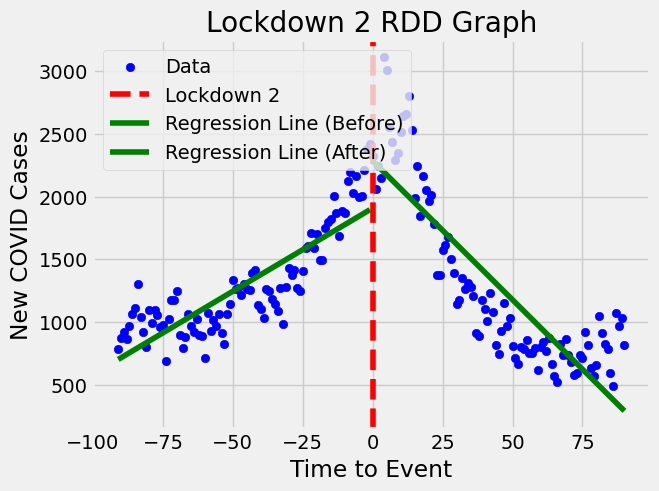

In [83]:
event_label = 'Lockdown 2'
start_date = pd.to_datetime('2020-12-25') - pd.DateOffset(months=3)
end_date = pd.to_datetime('2020-12-25') + pd.DateOffset(months=3)

df_event = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

event_date = pd.to_datetime('2020-12-25')

df_event['TimeToEvent'] = (df_event['Date'] - event_date).dt.days

df_before = df_event[df_event['TimeToEvent'] < 0]
X_before = df_before['TimeToEvent']
X_before_const = sm.add_constant(X_before)  
y_before = df_before['Nb_Nvx_Cas']
model_before = sm.OLS(y_before, X_before_const).fit()

df_after = df_event[df_event['TimeToEvent'] >= 0]
X_after = df_after['TimeToEvent']
X_after_const = sm.add_constant(X_after)  
y_after = df_after['Nb_Nvx_Cas']
model_after = sm.OLS(y_after, X_after_const).fit() 

print(f'{event_label} - Regression Before Event:')
print(model_before.summary())
print()
print()
print()
print()
print(f'{event_label} - Regression After Event:')
print(model_after.summary())

plt.scatter(df_event['TimeToEvent'], df_event['Nb_Nvx_Cas'], color='blue', label='Data')
plt.axvline(x=0, color='red', linestyle='--', label=event_label)

plt.plot(df_before['TimeToEvent'], model_before.predict(X_before_const), color='green', label='Regression Line (Before)')

plt.plot(df_after['TimeToEvent'], model_after.predict(X_after_const), color='green', label='Regression Line (After)')

plt.xlabel('Time to Event')
plt.ylabel('New COVID Cases')
plt.title(f'{event_label} RDD Graph')
plt.legend()
plt.show()







Lockdown 2 - Regression Before Event (with Polynomial Features):
                            OLS Regression Results                            
Dep. Variable:             Nb_Nvx_Cas   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     317.0
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           6.01e-41
Time:                        00:46:52   Log-Likelihood:                -580.70
No. Observations:                  91   AIC:                             1167.
Df Residuals:                      88   BIC:                             1175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

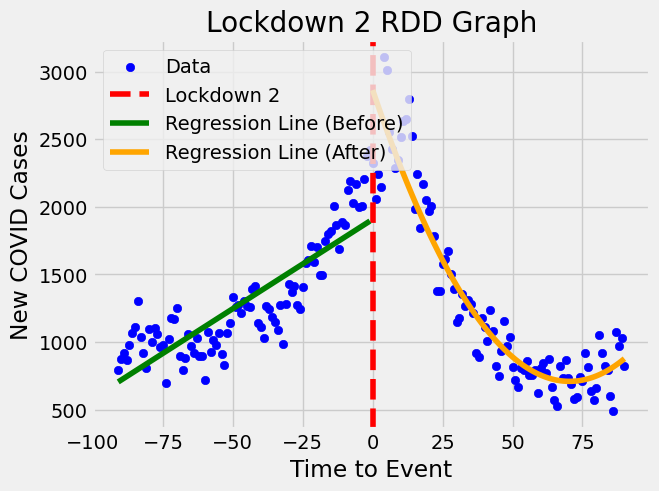

In [80]:
df_before = df_event[df_event['TimeToEvent'] < 0]
df_after = df_event[df_event['TimeToEvent'] >= 0]


X_before = df_before['TimeToEvent']
y_before = df_before['Nb_Nvx_Cas']
model_before = sm.OLS(y_before, sm.add_constant(X_before)).fit()

X_after = df_after['TimeToEvent']
y_after = df_after['Nb_Nvx_Cas']
model_after = sm.OLS(y_after, sm.add_constant(X_after)).fit()


degree = 2 
X_before_poly = pd.DataFrame({'TimeToEvent': X_before, 'TimeToEvent^2': X_before**2})
model_before_poly = sm.OLS(y_before, sm.add_constant(X_before_poly)).fit()

X_after_poly = pd.DataFrame({'TimeToEvent': X_after, 'TimeToEvent^2': X_after**2})
model_after_poly = sm.OLS(y_after, sm.add_constant(X_after_poly)).fit()

print(f'{event_label} - Regression Before Event (with Polynomial Features):')
print(model_before_poly.summary())
print()
print(f'{event_label} - Regression After Event (with Polynomial Features):')
print(model_after_poly.summary())

plt.scatter(df_event['TimeToEvent'], df_event['Nb_Nvx_Cas'], color='blue', label='Data')
plt.axvline(x=0, color='red', linestyle='--', label=event_label)


plt.plot(X_before, model_before.predict(sm.add_constant(X_before)), color='green', label='Regression Line (Before)')


X_after_plot = pd.DataFrame({'TimeToEvent': X_after, 'TimeToEvent^2': X_after**2})
plt.plot(X_after, model_after_poly.predict(sm.add_constant(X_after_plot)), color='orange', label='Regression Line (After)')

plt.xlabel('Time to Event')
plt.ylabel('New COVID Cases')
plt.title(f'{event_label} RDD Graph')
plt.legend()
plt.show()

# FINDINGS

I Decided to add polynomial features to all of the graphs since it seems better based on the observations. as for the model, all the R squered worked and improved with the polynomial features.

the time selected was 3 months before and after the events since it seem a reasonable ammount of time to get valuable data validation without having to add the whole data from the data frame.


for lockdown 1:
before the event no many case were registered( small increased around the start of the event).After the event we see an increased of around 24 new cases by day within the first 40 days then cases start dreceasing maybe due to the effect of the lockdown by the same amount.

for the school Reopening:
before the event the cases were stable around 1-2 new cases by day, but then after the event the cases spiked exponentailly we see an incresed of 27 new cases after the event.


for lockdown 2:
before the event the cases were increasing around 37 new more cases everyday, but then after the event the cases of covid started dreceased by 61 by day.

### CONCLUSION

To conclude, based on the analisys and the visualitations from above, we can conclude that the lockdowns decreased the number of new cases of covid while the reopening of schools increased the number of new covid cases.
there may be external factors not account in this graphs, but i assumme thevariance of the covid cases are cause by the events. 

#### Reference

https://matheusfacure.github.io/python-causality-handbook/16-Regression-Discontinuity-Design.html
